In [14]:
%matplotlib inline

import tensorflow as tf
import numpy as np
from sklearn import svm
from sklearn.metrics import hinge_loss
from sklearn.preprocessing import LabelBinarizer

import os
import sys
import matplotlib.pyplot as plt

In [ ]:
sess = tf.InteractiveSession()

# Multi-class Support Vector Loss (Hinge Loss)

## Hinge loss
![](https://upload.wikimedia.org/math/e/5/2/e5268ede02bd68d2f4f82001e833c115.png)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Hinge_loss_vs_zero_one_loss.svg/720px-Hinge_loss_vs_zero_one_loss.svg.png)

## SVM loss
![](https://upload.wikimedia.org/math/e/8/2/e8251c3505995482af3ecde5d84491b7.png)

In [97]:
y_ = np.array([[0,0,1],[0,1,0],[0,0,10]])
y = [2, 1, 0]
print hinge_loss(y, y_, [0, 1, 2])*3

y_ = np.array([[0,0,1],[0,1,0],[0,10,10]])
y = [2, 1, 0]
print hinge_loss(y, y_, [0, 1, 2])*3

y_ = np.array([[0,0,1],[0,1,0],[0,10,20]])
y = [2, 1, 0]
print hinge_loss(y, y_, [0, 1, 2])*3

# correct score와 incorrect score의 차이가 lambda=1 보다 크면 (이미 맞았으면)
# loss를 항상 0으로 계산
y_ = np.array([[0,0,1],[0,1,0],[10, -1, -1]])
y = [2, 1, 0]
print hinge_loss(y, y_, [0, 1, 2])*3

y_ = np.array([[0,0,1],[0,1,0],[10, 5, 5]])
y = [2, 1, 0]
print hinge_loss(y, y_, [0, 1, 2])*3

y_ = np.array([[0,0,1],[0,1,0],[10, 9, 9]])
y = [2, 1, 0]
print hinge_loss(y, y_, [0, 1, 2])*3

# 즉, SVM을 사용할때 truck과 car을 구분하는 classifier는 dog 이미지에 전혀 영향을 안받음
# local objective

11.0
11.0
21.0
0.0
0.0
0.0


# Softmax cross entropy loss

## Softmax 
![](https://upload.wikimedia.org/math/0/9/9/0991837b7d5a522ebc156f51dadbed0e.png)

## cross entropy loss
![](https://upload.wikimedia.org/math/8/7/5/875c6f70e04e4a2ddf50a69d54533847.png)

In [99]:
print tf.nn.softmax_cross_entropy_with_logits([[10., -1., -1.]], [[1., 0., 0.]]).eval()
print tf.nn.softmax_cross_entropy_with_logits([[10., 5., 5.]], [[1., 0., 0.]]).eval()
print tf.nn.softmax_cross_entropy_with_logits([[10., 9., 9.]], [[1., 0., 0.]]).eval()

# 항상 만족하지 못하고 loss를 만들어냄
# 따라서 항상 loss는 줄어들 것이다

[  3.33780445e-05]
[ 0.0133859]
[ 0.55144465]


In [121]:
tf.nn.sigmoid_cross_entropy_with_logits?

# 왜 sigmoid가 softmax보다 mutli label classification에 유리한가?

In [133]:
y_ = [[0.4, 0.6, 0.2]]
y = [[0., 1., 0.]]

print y * tf.log(tf.nn.softmax(y_)).eval()
print -tf.reduce_sum(y * tf.log(tf.nn.softmax(y_))).eval()
print tf.nn.softmax_cross_entropy_with_logits(y_, y).eval()

y_ = [[0.4, 0.6, 0.2]]
y = [[0., 1., 1.]]
print y * tf.log(tf.nn.softmax(y_)).eval()
print -tf.reduce_sum(y * tf.log(tf.nn.softmax(y_))).eval()
print tf.nn.softmax_cross_entropy_with_logits(y_, y).eval()

print "########################################"

y_ = [[0.4, 0.6, 0.2]]
y = [[0., 1., 0.]]
y = tf.constant(y, "float64")
y_ = tf.constant(y_, "float64")

tmp = tf.maximum(y, 0) - y * y_ + tf.log(tf.ones_like(y) + tf.exp(-y))
print tmp.eval()

print tf.nn.sigmoid_cross_entropy_with_logits(y, y_).eval()

y_ = [[0.4, 0.6, 0.2]]
y = [[0., 1., 1.]]
print tf.nn.sigmoid_cross_entropy_with_logits(y, y_).eval()

[[-0.         -0.91190147 -0.        ]]
0.911901
[ 0.91190147]
[[-0.         -0.91190147 -1.31190145]]
2.2238
[ 2.22380304]
########################################
[[ 0.69314718  0.71326169  0.69314718]]
[[ 0.69314718  0.71326169  0.69314718]]
[[ 0.69314718  0.7132616   1.1132617 ]]


# Gradient Descent

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
[  7.  12.  17.  22.  27.  32.  37.  42.  47.  52.]


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


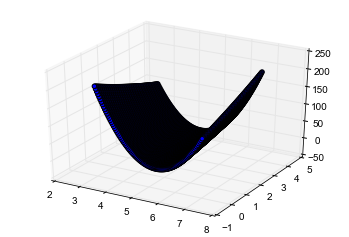

In [145]:
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(1,10,10)
print x

y = 5 *x + 2
print y

w = np.linspace(3, 7, 100)
b = np.linspace(0, 4, 100)

for w_ in w:
    for b_ in b:
        y_ = [w_*x_+b_ for x_ in x]
        loss = mean_squared_error(y_, y)
        ax.scatter(w_, b_, loss)

plt.show()

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Gradient_descent.svg/350px-Gradient_descent.svg.png)

# A Step by Step Backpropagation Example

http://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

![](http://image.slidesharecdn.com/cnnbp-140313190836-phpapp02/95/backpropagation-in-convolutional-neural-network-8-638.jpg?cb=1446790188)

In [147]:
# Convolutional Layer
x_data = np.ones([3., 3.]).astype("float32")
x_data = np.reshape(x_data, [1, 3, 3, 1])

w = np.ones([2,2])
w = tf.cast(tf.reshape(w, [2, 2, 1, 1]), "float")

print tf.nn.conv2d(x_data, w, [1, 1, 1, 1], 'SAME').eval()

[[[[ 4.]
   [ 4.]
   [ 2.]]

  [[ 4.]
   [ 4.]
   [ 2.]]

  [[ 2.]
   [ 2.]
   [ 1.]]]]


In [146]:
import numpy as np
import scipy.io as sio
import tensorflow as tf
import scipy.misc as sm

def imread(path):
    return sm.imread(path).astype(np.float)

mat_path = "./imagenet-vgg-verydeep-19.mat"
mat = sio.loadmat(mat_path)

for idx, layer in enumerate(mat['layers'][0]):
    try:
        print "[%s]" % idx, ":", layer[0][0][0][0][0].shape
        print "[%sb]" % idx, ":", layer[0][0][0][0][1].shape
    except:
        print "[%s]" % idx, ":", layer

[0] : (3, 3, 3, 64)
[0b] : (1, 64)
[1] : [1] : [[([u'relu'], [u'relu1_1'])]]
[2] : (3, 3, 64, 64)
[2b] : (1, 64)
[3] : [3] : [[([u'relu'], [u'relu1_2'])]]
[4] : [4] : [[ ([u'pool1'], [[2.0, 2.0]], [[0.0, 0.0, 0.0, 0.0]], [u'pool'], [u'max'], [[2.0, 2.0]])]]
[5] : (3, 3, 64, 128)
[5b] : (1, 128)
[6] : [6] : [[([u'relu'], [u'relu2_1'])]]
[7] : (3, 3, 128, 128)
[7b] : (1, 128)
[8] : [8] : [[([u'relu'], [u'relu2_2'])]]
[9] : [9] : [[ ([u'pool2'], [[2.0, 2.0]], [[0.0, 0.0, 0.0, 0.0]], [u'pool'], [u'max'], [[2.0, 2.0]])]]
[10] : (3, 3, 128, 256)
[10b] : (1, 256)
[11] : [11] : [[([u'relu'], [u'relu3_1'])]]
[12] : (3, 3, 256, 256)
[12b] : (1, 256)
[13] : [13] : [[([u'relu'], [u'relu3_2'])]]
[14] : (3, 3, 256, 256)
[14b] : (1, 256)
[15] : [15] : [[([u'relu'], [u'relu3_3'])]]
[16] : (3, 3, 256, 256)
[16b] : (1, 256)
[17] : [17] : [[([u'relu'], [u'relu3_4'])]]
[18] : [18] : [[ ([u'pool3'], [[2.0, 2.0]], [[0.0, 0.0, 0.0, 0.0]], [u'pool'], [u'max'], [[2.0, 2.0]])]]
[19] : (3, 3, 256, 512)
[19b] : (

In [148]:
content_img = "./test.png"
style_img = "./style.jpg"

def conv2d(weight, bias):
    def make_layer(input):
        conv = tf.nn.conv2d(input, weight, strides=[1,1,1,1], padding='SAME')
        return tf.nn.bias_add(conv, bias)
    return make_layer

def max_pool():
    def make_layer(input):
        return tf.nn.max_pool(input, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    return make_layer

def preprocess(image, mean_pixel):
    return image - mean_pixel

def unprocess(image, mean_pixel):
    return image + mean_pixel

CONTENT_LAYER = 'relu_4_2'

![](http://3.bp.blogspot.com/-0-i94WQO1dE/VTUiGLxiEtI/AAAAAAAAAsI/tamhfG_uwb4/s1600/%E6%93%B7%E5%8F%96.PNG)

http://cvlab.postech.ac.kr/research/deconvnet

![](http://cvlab.postech.ac.kr/research/deconvnet/images/overall.png)

In [149]:
def build_layer(x):
    layer_defs = [
        'conv_1_1', 'relu_1_1','conv1_2', 'relu_1_2', 'pool_1',
        'conv_2_1', 'relu_2_1','conv2_2', 'relu_2_2', 'pool_2',

        'conv_3_1', 'relu_3_1','conv3_2', 'relu_3_2',
        'conv_3_3', 'relu_3_3', 'conv3_4', 'relu_3_4', 'pool_3',
        'conv_4_1', 'relu_4_1','conv4_2', 'relu_4_2',
        'conv_4_3', 'relu_4_3', 'conv4_4', 'relu_4_4', 'pool_4',

        'conv_5_1', 'relu_5_1','conv4_2', 'relu_5_2',
        'conv_5_3', 'relu_5_3', 'conv4_4', 'relu_5_4'
    ]

    mean = mat['normalization'][0][0][0] # (224, 224, 3)
    mean_pixel = np.mean(mean, axis=(0,1))

    # mat['layers'] : [1 x 43]
    constants = mat['layers'][0]

    layers = []
    for idx, layer_def in enumerate(layer_defs):
        if 'conv' in layer_def:
            w = constants[idx][0][0][0][0][0]
            w = np.transpose(w, (1, 0, 2, 3)) # [3 x 3 x 3 x 64] : 3x3 conv, 3 input, 64 output channels
            b = constants[idx][0][0][0][0][1] # [1 x 64] -> [64]
            b = b.reshape(-1)                 # [64]
            ops = conv2d(w, b)
        elif 'relu' in layer_def:
            ops = tf.nn.relu
        elif 'pool' in layer_def:
            ops = max_pool()
        else:
            raise "Wrong layer def : %s" % layer_def

        if not layers:
            layers.append(ops(x))
        else:
            layers.append(ops(layers[-1]))

    layer_dict = dict(zip(layer_defs, layers))

    return layer_dict, mean_pixel

In [150]:
content_features = {}

################
# content img
################

content = imread(content_img)
shape = (1,) + content.shape
x = tf.placeholder('float', shape=shape)

layer_dict, mean_pixel = build_layer(x)

content_pre = np.array([preprocess(content, mean_pixel)]) # [1 x 460 x 460 x 3]
content_features[CONTENT_LAYER] = layer_dict[CONTENT_LAYER].eval(feed_dict={x: content_pre})

In [151]:
################
# style img
################

style = imread(style_img)
shape = (1,) + content.shape
x = tf.placeholder('float', shape=shape)

layer_dict, mean_pixel = build_layer(x)

style_pre = np.array([preprocess(style, mean_pixel)]) # [1 x 460 x 460 x 3]

for layer in STYLE_LAYERS:
    content_features[layer] = layer_dict[layer].eval(feed_dict={x: content_pre})

x = tf.placeholder('float', shape=shape)

NameError: name 'STYLE_LAYERS' is not defined